In [23]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_asset = pd.read_csv('Portfolio_Betas.csv')

In [3]:
df_residuals = pd.read_csv('Portfolio_Residuals.csv')
df_residuals = pd.read_csv('Portfolio_Residuals.csv')
df_residuals = df_residuals.set_index('Unnamed: 0')

In [4]:
corr_residuals = df_residuals.corr()
cov_residuals = np.array(df_residuals.cov())
alphas = np.array(df_asset['Intercept'])

In [5]:
initial_weight = np.array(df_asset['Beta_weight'])

In [6]:
df_asset.columns

Index(['Unnamed: 0', 'Symbol', 'Description', 'Quantity', 'Currency',
       'LastPrice', 'PricePaid', 'DayChange', 'ProfitLoss', 'MarketValue',
       'ProfitLossPercentage', 'Long(1)/Short(-1)', 'Position_Weight',
       'Intercept', 'mkt', 'smb', 'hml', 'rmw', 'cma', 'Ticker',
       'Market_Position', 'Beta_weight'],
      dtype='object')

In [51]:
df_residuals.shape[0]

478

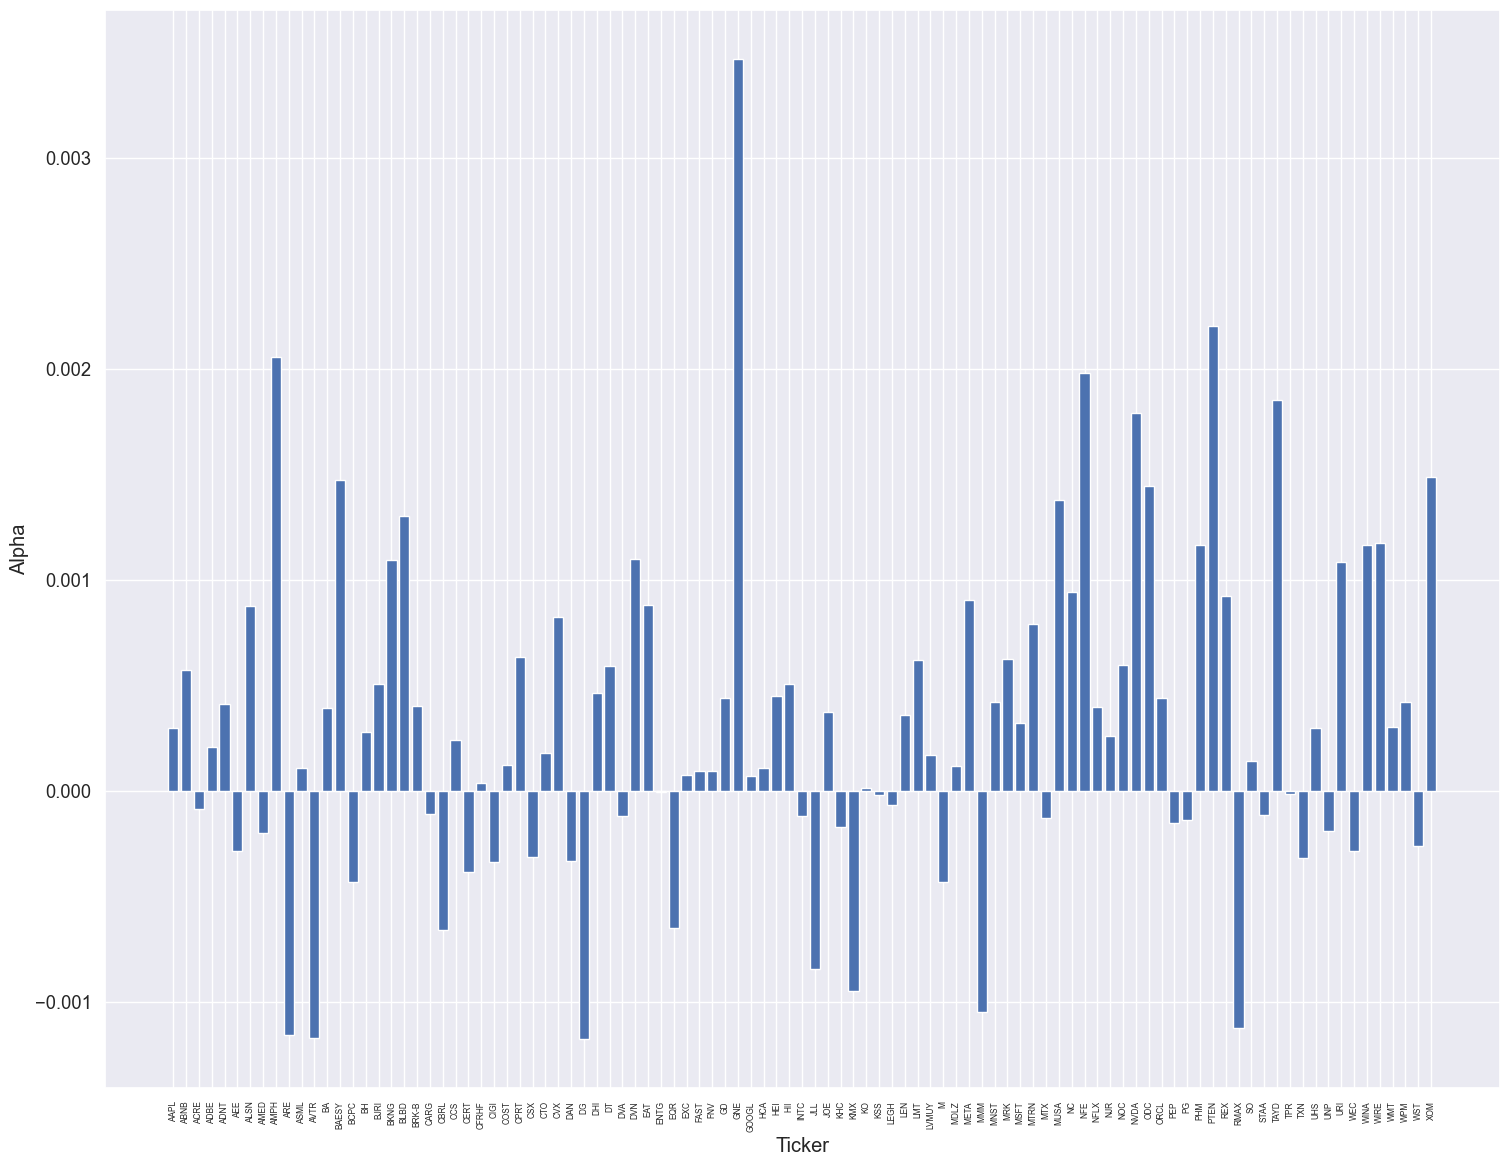

In [50]:
plt.figure(figsize=(18, 14)) 
plt.bar(df_asset['Ticker'], df_asset['Intercept'])
plt.xticks(range(df_asset.shape[0]), labels= df_asset['Ticker'], rotation=90, fontsize=6)
plt.ylabel('Alpha')
plt.xlabel('Ticker')

plt.show()

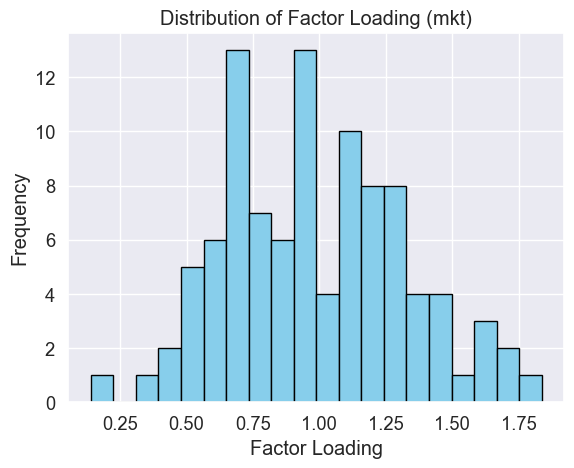

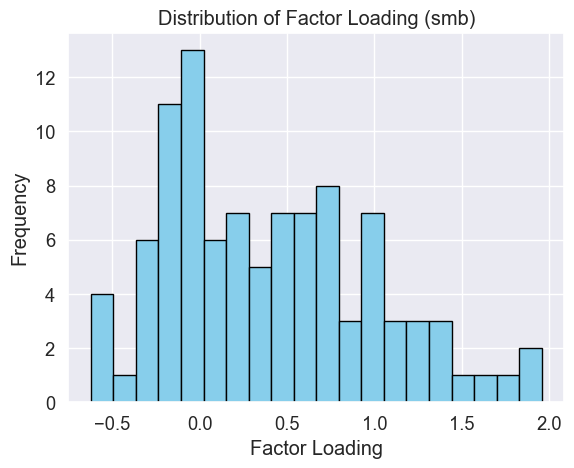

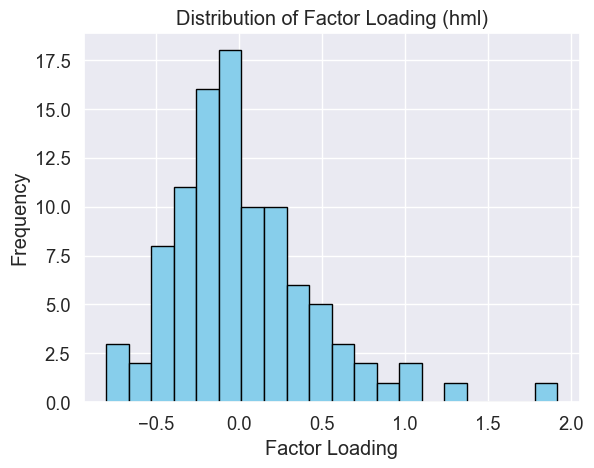

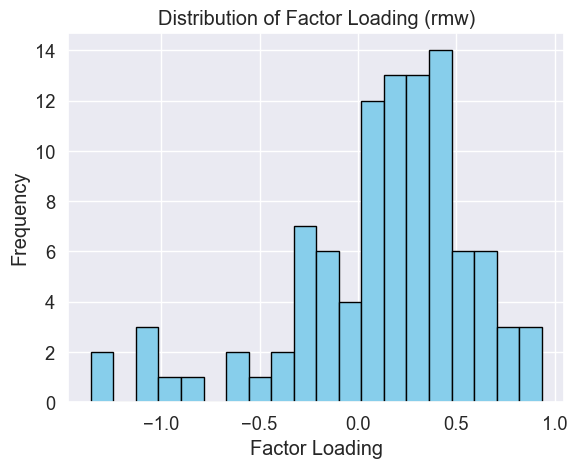

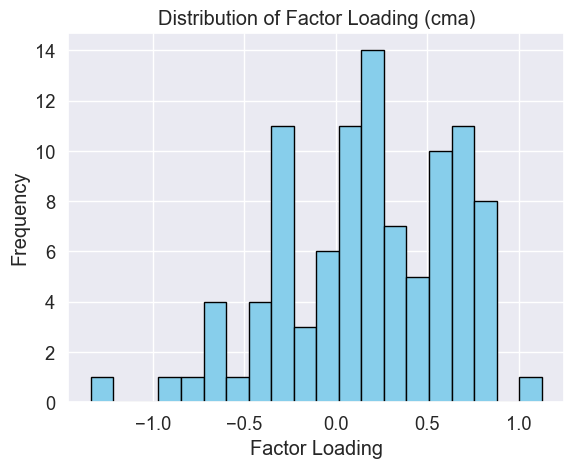

In [41]:

for i in ['mkt', 'smb', 'hml', 'rmw', 'cma']:
    df_asset.loc[:, i].plot.hist(bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Factor Loading ('+i+')')
    plt.xlabel('Factor Loading')
    plt.show()

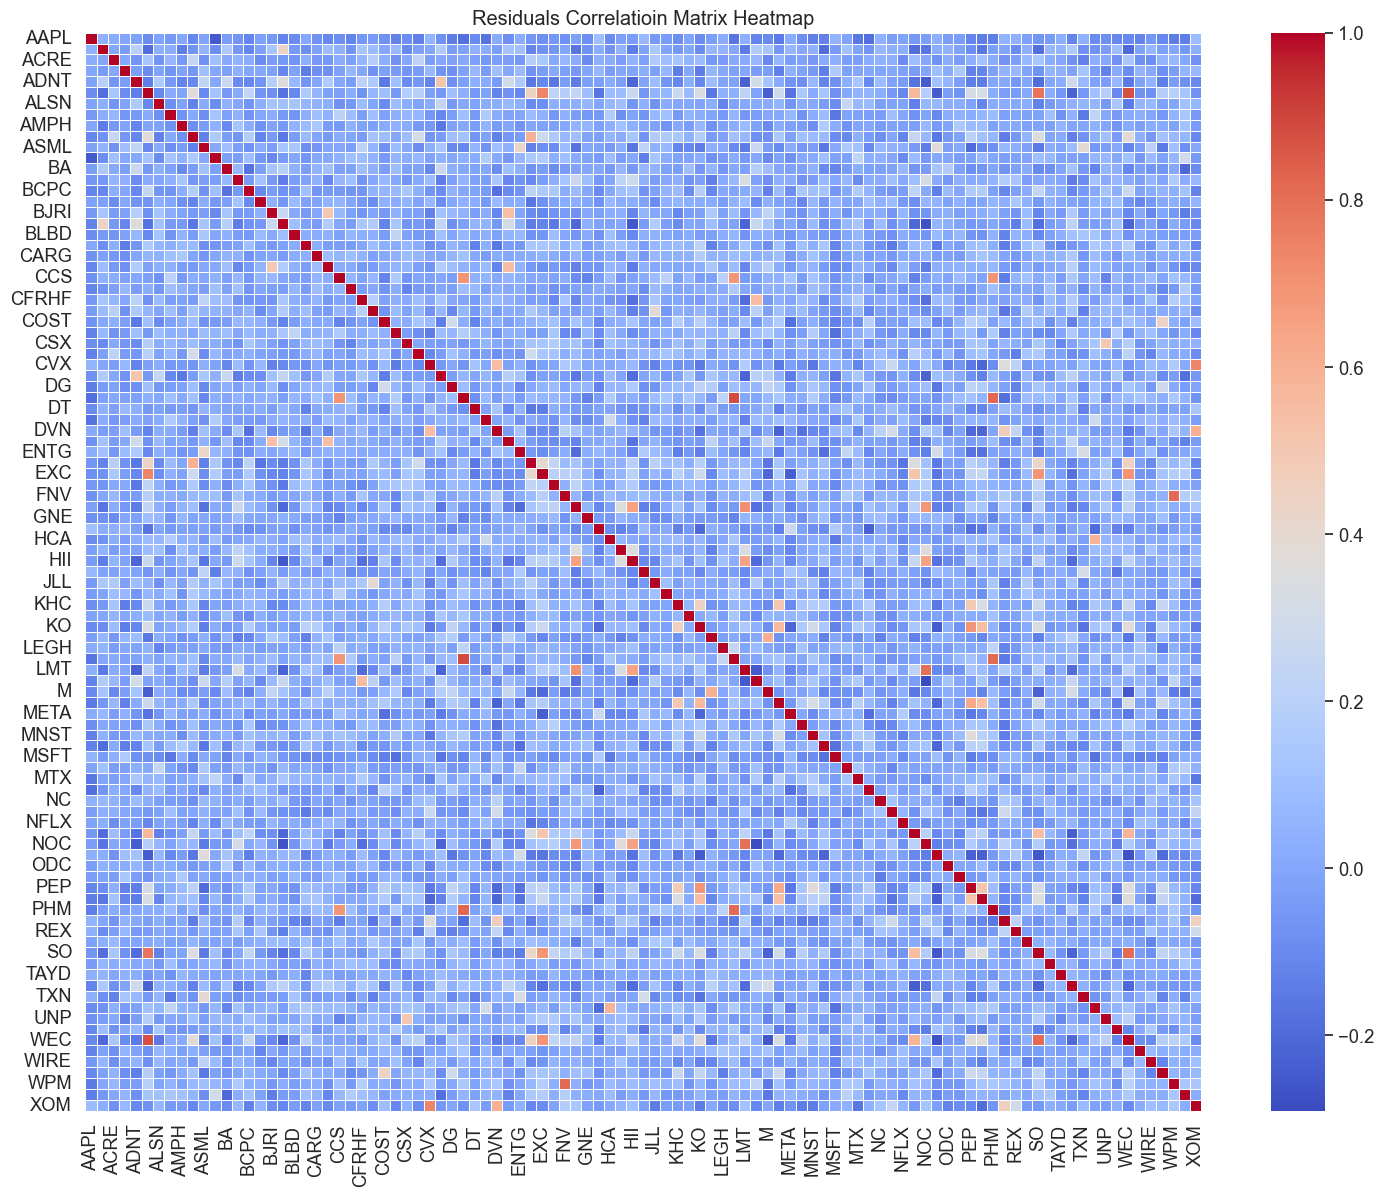

In [35]:
# Create a heatmap using Seaborn
plt.figure(figsize=(18, 14))
sns.set(font_scale=1.2)
sns.heatmap(df_residuals.corr(), annot=False, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Residuals Correlatioin Matrix Heatmap")

plt.show()

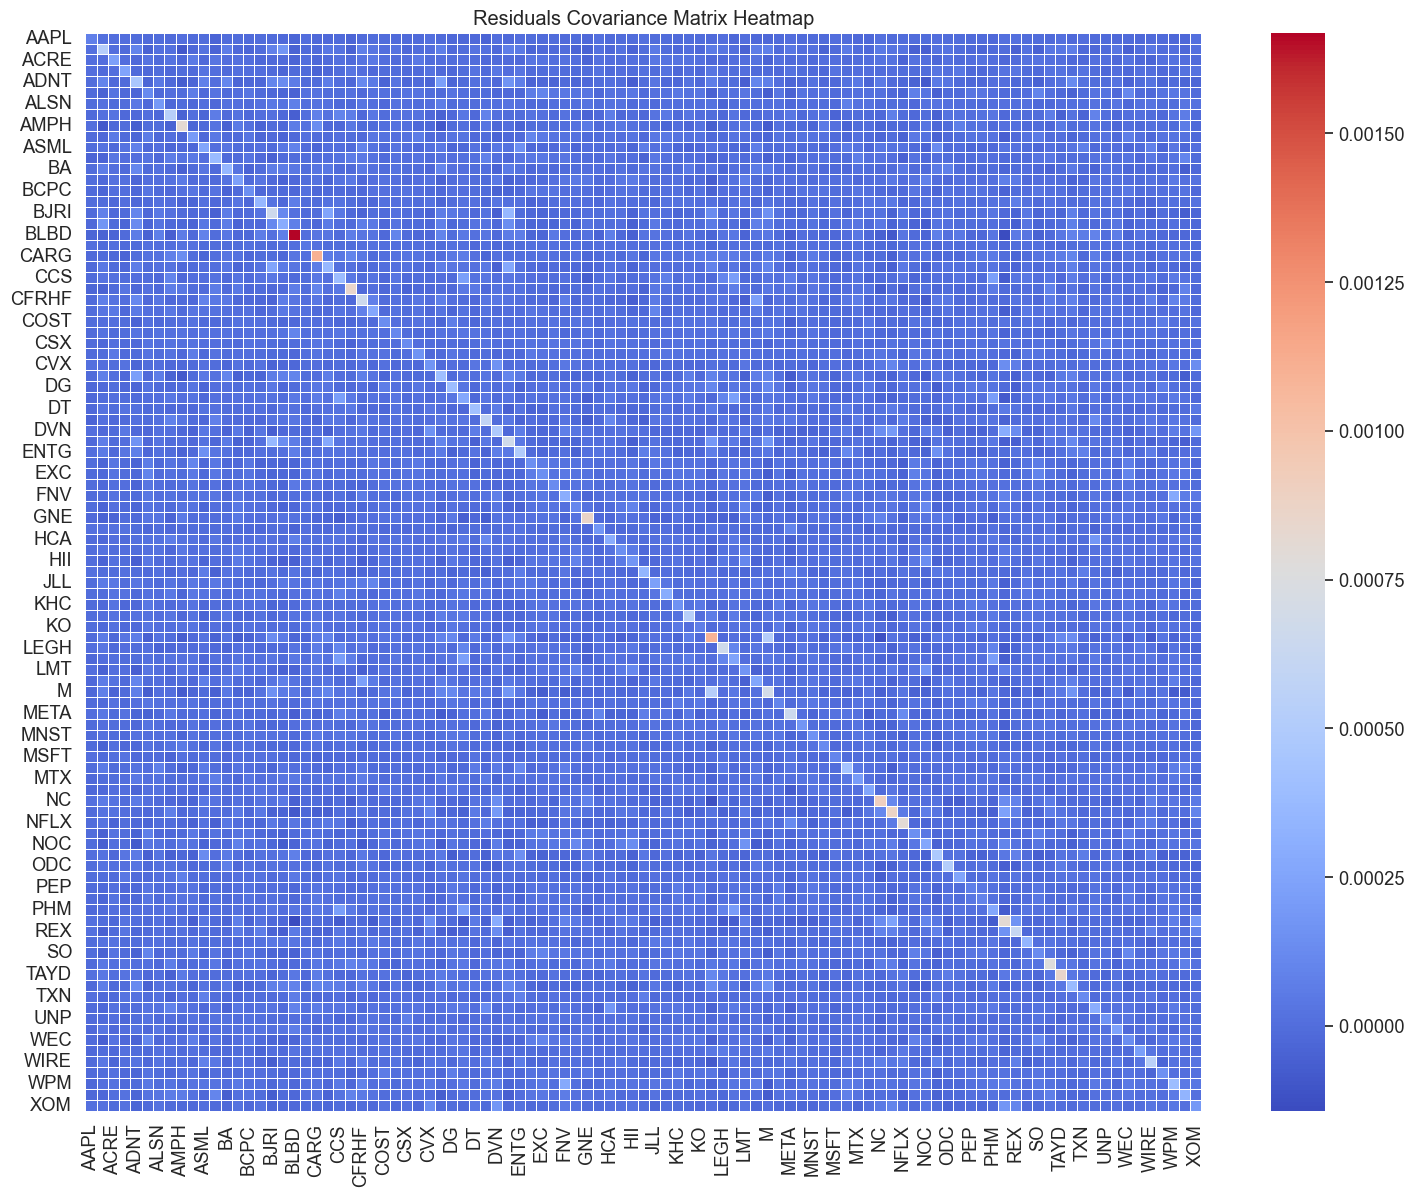

In [33]:
# Create a heatmap using Seaborn
plt.figure(figsize=(18, 14))
sns.set(font_scale=1.2)
sns.heatmap(df_residuals.cov(), annot=False, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Residuals Covariance Matrix Heatmap")



plt.title("Residuals Covariance Matrix Heatmap")

plt.show()

In [7]:
betas = df_asset.loc[:,['mkt', 'smb', 'hml', 'rmw', 'cma']]

In [8]:
def beta_calculation_long_short_strategy(beta_i_s, weight_i):
    # beta_i_s : np array
    # weight_i : np array
    return (beta_i_s@weight_i)*2

#beta_calculation_long_short_strategy(np.array(df_asset['mkt']), initial_weight)

In [9]:
def portfolio_variance(weight, covariance_matrix):
    # multiply how much for a leveraged strategy? 
    return np.dot(weight.T, np.dot(covariance_matrix, weight)) * 4
# portfolio_variance(initial_weight, cov_residuals)

In [10]:
def portfolio_alpha(weight, alphas):
    # multiply how much for a leveraged strategy? 2
    return (weight@alphas)*2
# portfolio_alpha(initial_weight, alphas)

# Optimizing

In [11]:
error_tolerance = 0.05


betas_targets = [[0,-1,0,0,0],
                [0.25,-1,0,0,0],
                [-1,-1,0.5,0,0]]
betas_bounds = []

for k in betas_targets:
    
    betas_bound = [(i+error_tolerance, i-error_tolerance) for i in k]
    betas_bounds.append(betas_bound)
    

In [12]:
results = []

for b_b in betas_bounds:

    # beta constraint -----------
    mkt_beta_upper_bound = b_b[0][0]
    mkt_beta_lower_bound = b_b[0][1]

    smb_beta_upper_bound = b_b[1][0]
    smb_beta_lower_bound = b_b[1][1]

    hml_beta_upper_bound = b_b[2][0]
    hml_beta_lower_bound = b_b[2][1]

    rmw_beta_upper_bound = b_b[3][0]
    rmw_beta_lower_bound = b_b[3][1]

    cma_beta_upper_bound = b_b[4][0]
    cma_beta_lower_bound = b_b[4][1]

    '''
    Scenario 1

    mkt_beta_upper_bound = 1
    mkt_beta_lower_bound = 0.25

    smb_beta_upper_bound = - 1
    smb_beta_lower_bound = - 2 #-100

    hml_beta_upper_bound = 0.05
    hml_beta_lower_bound = -0.05

    rmw_beta_upper_bound = 0.05
    rmw_beta_lower_bound = -0.05

    cma_beta_upper_bound = 0.05
    cma_beta_lower_bound = -0.05
    '''



    def Constraint_mkt_beta_lower_bound(weight):
        global betas
        return beta_calculation_long_short_strategy(np.array(betas['mkt']), weight) - (mkt_beta_lower_bound )
    def Constraint_smb_beta_lower_bound(weight):
        global betas
        return beta_calculation_long_short_strategy(np.array(betas['smb']), weight) - (smb_beta_lower_bound )
    def Constraint_hml_beta_lower_bound(weight):
        global betas
        return beta_calculation_long_short_strategy(np.array(betas['hml']), weight) - (hml_beta_lower_bound )
    def Constraint_rmw_beta_lower_bound(weight):
        global betas
        return beta_calculation_long_short_strategy(np.array(betas['rmw']), weight) - (rmw_beta_lower_bound )
    def Constraint_cma_beta_lower_bound(weight):
        global betas
        return beta_calculation_long_short_strategy(np.array(betas['cma']), weight) - (cma_beta_lower_bound )


    def Constraint_mkt_beta_upper_bound(weight):
        global betas
        return (mkt_beta_upper_bound) - beta_calculation_long_short_strategy(np.array(betas['mkt']), weight) 
    def Constraint_smb_beta_upper_bound(weight):
        global betas
        return (smb_beta_upper_bound ) - beta_calculation_long_short_strategy(np.array(betas['smb']), weight) 
    def Constraint_hml_beta_upper_bound(weight):
        global betas
        return (hml_beta_upper_bound) - beta_calculation_long_short_strategy(np.array(betas['hml']), weight) 
    def Constraint_rmw_beta_upper_bound(weight):
        global betas
        return (rmw_beta_upper_bound) - beta_calculation_long_short_strategy(np.array(betas['rmw']), weight) 
    def Constraint_cma_beta_upper_bound(weight):
        global betas
        return (cma_beta_upper_bound ) - beta_calculation_long_short_strategy(np.array(betas['cma']), weight) 

    # ['mkt', 'smb', 'hml', 'rmw', 'cma']

    # weight constraint -----------
    weight_sum_upper_bound = 0.05
    weight_sum_lower_bound = -0.05


    long_short_ratio_upper_bound = 1.05
    long_short_ratio_lower_bound = 0.95

    def Constraint_weight_sum_lower_bound(weight):
        return np.sum(weight) - (weight_sum_lower_bound)

    def Constraint_weight_sum_upper_bound(weight):
        return  (weight_sum_upper_bound)- np.sum(weight) 

    def Constraint_long_short_ratio_lowerbound(weight):
        return (-np.sum(weight[weight>0])/np.sum(weight[weight<0])) - long_short_ratio_lower_bound

    def Constraint_long_short_ratio_upperbound(weight):
        return long_short_ratio_upper_bound - (-np.sum(weight[weight>0])/np.sum(weight[weight<0]))

    # weight constraint -----------
    weight_bounds = (0.005, 0.05)

    bounds = []
    for i in initial_weight:
        if i > 0:
            temp_bound = weight_bounds
        else: 
            temp_bound = (-weight_bounds[1], -weight_bounds[0])
        bounds.append(temp_bound)

    #leverage constraint -----------
    long_sum_weight_lower_bound = 0.475
    long_sum_weight_upper_bound = -0.475

    def Constraint_weight_sum_for_positive(weight):
        weight = np.array(weight)

        return  weight[weight>0].sum() - long_sum_weight_lower_bound

    def Constraint_weight_sum_for_negative(weight):
        weight = np.array(weight)

        return  long_sum_weight_upper_bound - weight[weight<0].sum()  

    # Perform the optimization

    def objective_function(x):

        global alphas
        global cov_residuals

        # portfolio_variance(initial_weight, cov_residuals)
        # portfolio_alpha(initial_weight, alphas)


        return -(portfolio_alpha(x, alphas)/np.sqrt(portfolio_variance(x, cov_residuals)))
        # return (-information ratio)
    constraints = ({'type': 'ineq', 'fun': Constraint_mkt_beta_lower_bound},
               {'type': 'ineq', 'fun': Constraint_smb_beta_lower_bound},
               {'type': 'ineq', 'fun': Constraint_hml_beta_lower_bound},
               {'type': 'ineq', 'fun': Constraint_rmw_beta_lower_bound},
               {'type': 'ineq', 'fun': Constraint_cma_beta_lower_bound},
               {'type': 'ineq', 'fun': Constraint_mkt_beta_upper_bound},
               {'type': 'ineq', 'fun': Constraint_smb_beta_upper_bound},
               {'type': 'ineq', 'fun': Constraint_hml_beta_upper_bound},
               {'type': 'ineq', 'fun': Constraint_rmw_beta_upper_bound},
               {'type': 'ineq', 'fun': Constraint_cma_beta_upper_bound},
               {'type': 'ineq', 'fun': Constraint_long_short_ratio_lowerbound},
               {'type': 'ineq', 'fun': Constraint_long_short_ratio_upperbound},
               {'type': 'ineq', 'fun': Constraint_weight_sum_for_positive},
               {'type': 'ineq', 'fun': Constraint_weight_sum_for_negative})

    '''
    {'type': 'ineq', 'fun': Constraint_weight_sum_lower_bound},
    {'type': 'ineq', 'fun': Constraint_weight_sum_upper_bound},

    '''

    result = minimize(objective_function, initial_weight, method='SLSQP',constraints=constraints, bounds=bounds, options={'maxiter': 100})
    results.append(result)

/Users/justin/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


# Efficient Frontier

In [13]:
initial_state = pd.DataFrame([beta_calculation_long_short_strategy(betas[i], initial_weight) for i in betas.columns])
initial_state = initial_state.T 
initial_state.columns = betas.columns
initial_state['alpha'] = portfolio_alpha(initial_weight, alphas)
initial_state['Constrained_information_ratio'] = - objective_function(initial_weight)
initial_state['Long/Short ratio'] = -(initial_weight[initial_weight>0].sum()/initial_weight[initial_weight<0].sum())
initial_state['Long weight position'] = initial_weight[initial_weight>0].sum()
initial_state['Short weight position'] = initial_weight[initial_weight<0].sum()
initial_state['Sum of long and Short weight'] = initial_state['Long weight position'] + initial_state['Short weight position']

initial_state

,mkt,smb,hml,rmw,cma,alpha,Constrained_information_ratio,Long/Short ratio,Long weight position,Short weight position,Sum of long and Short weight
0,-0.08731,-0.31485,0.001157,-0.071442,0.170551,0.000198,0.04543,1.012189,0.503029,-0.496971,0.006058


In [14]:
str(np.round(np.array(initial_state.iloc[0,0:5]), decimals=2))

'[-0.09 -0.31  0.   -0.07  0.17]'

In [15]:
str(np.round(initial_state.iloc[0,0:5], decimals=2).tolist())

'[-0.09, -0.31, 0.0, -0.07, 0.17]'

0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


/var/folders/2j/xqk1xvts58v88hvpqrdt8thw0000gn/T/ipykernel_69170/3899571594.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(tick_labels)


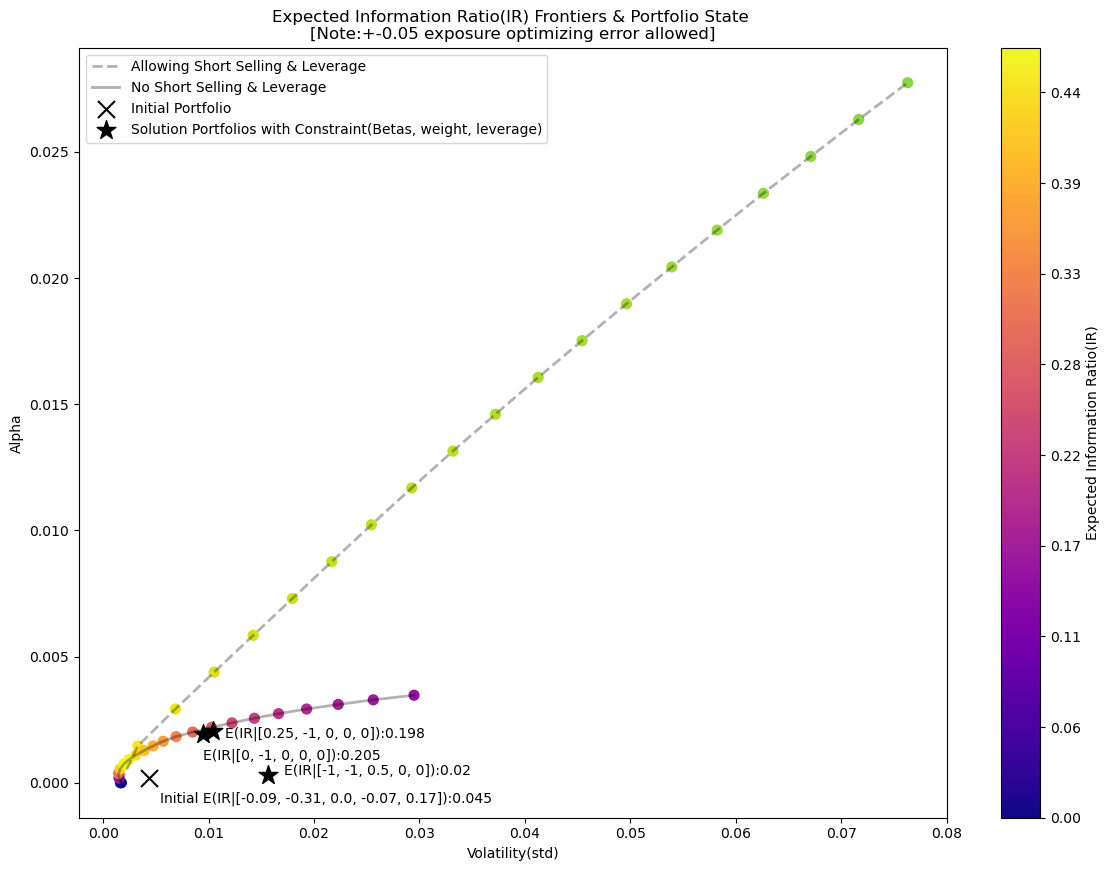

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.cm import ScalarMappable

def calculate_portfolio_return(weights, returns):
    return np.dot(weights, returns)

def calculate_portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def objective_function_2(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = calculate_portfolio_return(weights, returns)
    portfolio_volatility = calculate_portfolio_volatility(weights, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Minimize the negative of the Sharpe ratio

def optimize_weights(returns, cov_matrix, risk_free_rate, allow_short=True):
    num_assets = len(returns)
    
    if allow_short:
        bounds = tuple((-1, 1) for asset in range(num_assets))
    else:
        bounds = tuple((0, 1) for asset in range(num_assets))

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    initial_weights = np.ones(num_assets) / num_assets  # Equal weights to start with

    result = minimize(
        objective_function_2,
        initial_weights,
        args=(returns, cov_matrix, risk_free_rate),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return result.x

def generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=True, num_points=20):
    efficient_frontier = []
    #target_returns = np.linspace(min(returns), max(returns), num_points)
    target_returns = np.linspace(0, max(returns), num_points)
    

    for i, target_return in enumerate(target_returns):
        print(str(i),"/",str(len(target_returns)))
        

        if allow_short:
            bounds = tuple((-1, 1) for asset in range(len(returns)))
            target_return = target_return * 8 # be cautious !! this is just for plotting purpose!! should be remove in future applicaiton
        else:
            bounds = tuple((0, 1) for asset in range(len(returns)))
            
        constraints = ({'type': 'eq', 'fun': lambda weights: calculate_portfolio_return(weights, returns) - target_return},
                       {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

        result = minimize(
            calculate_portfolio_volatility,
            x0=np.ones(len(returns)) / len(returns),
            args=(cov_matrix,),
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )

        efficient_frontier.append([target_return, result.fun, (target_return - risk_free_rate) / result.fun])

    return np.array(efficient_frontier)

sharpe_ratio_max = 0
sharpe_ratio_min = 0

def plot_efficient_frontiers(returns, cov_matrix, risk_free_rate):
    efficient_frontier_short = generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=True)
    efficient_frontier_no_short = generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=False)

    
    # Set up a colormap
    cmap = plt.get_cmap('viridis')
    max_sharpe_both = max(np.max(efficient_frontier_short[:, 2]), np.max(efficient_frontier_no_short[:, 2]))
    global sharpe_ratio_max
    sharpe_ratio_max = max_sharpe_both
    
    min_sharpe_both = max(np.min(efficient_frontier_short[:, 2]), np.min(efficient_frontier_no_short[:, 2]))
    global sharpe_ratio_min
    sharpe_ratio_min = min_sharpe_both
    '''
    # Normalize the Sharpe ratios to be in the range [0, 1] for colormap mapping
    normalized_sharpe_short = efficient_frontier_short[:, 2] / max_sharpe_both
    normalized_sharpe_no_short = efficient_frontier_no_short[:, 2] / max_sharpe_both
    '''
    
    # Normalize the Sharpe ratios to be in the range [0, 1] for colormap mapping
    normalized_sharpe_short = (efficient_frontier_short[:, 2] ) / (max_sharpe_both )
    normalized_sharpe_no_short = (efficient_frontier_no_short[:, 2] ) / (max_sharpe_both )


        
    plt.plot(efficient_frontier_short[:, 1], efficient_frontier_short[:, 0], color='black', linestyle = '--', label='Allowing Short Selling & Leverage', alpha=0.3, linewidth=2)
    plt.plot(efficient_frontier_no_short[:, 1], efficient_frontier_no_short[:, 0], color='black', linestyle = '-', label='No Short Selling & Leverage', alpha=0.3, linewidth=2)
    
    # Add colored points based on Sharpe ratio
    plt.scatter(efficient_frontier_short[:, 1], efficient_frontier_short[:, 0], c=normalized_sharpe_short, cmap='viridis', marker='o', s = 50)
    plt.scatter(efficient_frontier_no_short[:, 1], efficient_frontier_no_short[:, 0], c=normalized_sharpe_no_short, cmap='plasma', marker='o', s=50)
   
    
    
    cbar = plt.colorbar(label='Expected Information Ratio(IR)')
    #cbar.ax.set_yticklabels([])
    custom_ticks = np.linspace(sharpe_ratio_min, sharpe_ratio_max, 9, endpoint=True)
    tick_labels = [f"{label:.2f}" for label in custom_ticks]
    cbar.ax.set_yticklabels(tick_labels)
    

    
    
    plt.title('Expected Information Ratio(IR) Frontiers & Portfolio State \n[Note:+-0.05 exposure optimizing error allowed]')
    plt.xlabel('Volatility(std)')
    plt.ylabel('Alpha')
    #plt.legend()
    #plt.show()

# Example usage:
returns = alphas  # replace with your asset returns
cov_matrix = cov_residuals  # replace with your covariance matrix
risk_free_rate = 0.00  # replace with your risk-free rate


plt.figure(figsize=(14,10))# Adjust the width and height as needed

plot_efficient_frontiers(returns, cov_matrix, risk_free_rate)

Initial_IR = (portfolio_alpha(initial_weight, alphas)/np.sqrt(portfolio_variance(initial_weight, cov_residuals)))
Initial_exposure = str(np.round(initial_state.iloc[0,0:5], decimals=2).tolist())
plt.scatter(np.sqrt(portfolio_variance(initial_weight, cov_residuals)), portfolio_alpha(initial_weight, alphas), label = 'Initial Portfolio',  marker='x', c = 'black', s= 150)
plt.text(np.sqrt(portfolio_variance(initial_weight, cov_residuals)) + 0.001, portfolio_alpha(initial_weight, alphas) - 0.001, 'Initial E(IR|'+Initial_exposure +'):' + str(round(Initial_IR, 3)), color='black', fontsize=10, ha='left')

for i, result in enumerate(results):

    Solution_IR = (portfolio_alpha(result.x, alphas)/np.sqrt(portfolio_variance(result.x, cov_residuals)))
    if i == 0:
        plt.scatter(np.sqrt(portfolio_variance(result.x, cov_residuals)), portfolio_alpha(result.x, alphas), label = 'Solution Portfolios with Constraint(Betas, weight, leverage)' ,  marker='*', c = 'black' , s = 200, alpha=1)
        plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals)), portfolio_alpha(result.x, alphas) - 0.001, 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')

    else:
        plt.scatter(np.sqrt(portfolio_variance(result.x, cov_residuals)), portfolio_alpha(result.x, alphas), marker='*', c = 'black', s = 200, alpha=1)
        if i==1:
            plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals)+ 0.000025), portfolio_alpha(result.x, alphas) - 0.00025, 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')
        elif i==2:
            plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals)+ 0.00005), portfolio_alpha(result.x, alphas), 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')
        else:
            plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals)), portfolio_alpha(result.x, alphas), 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')


plt.legend() 
plt.show()

# Annualized the graph

0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


/var/folders/2j/xqk1xvts58v88hvpqrdt8thw0000gn/T/ipykernel_69170/3899571594.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(tick_labels)


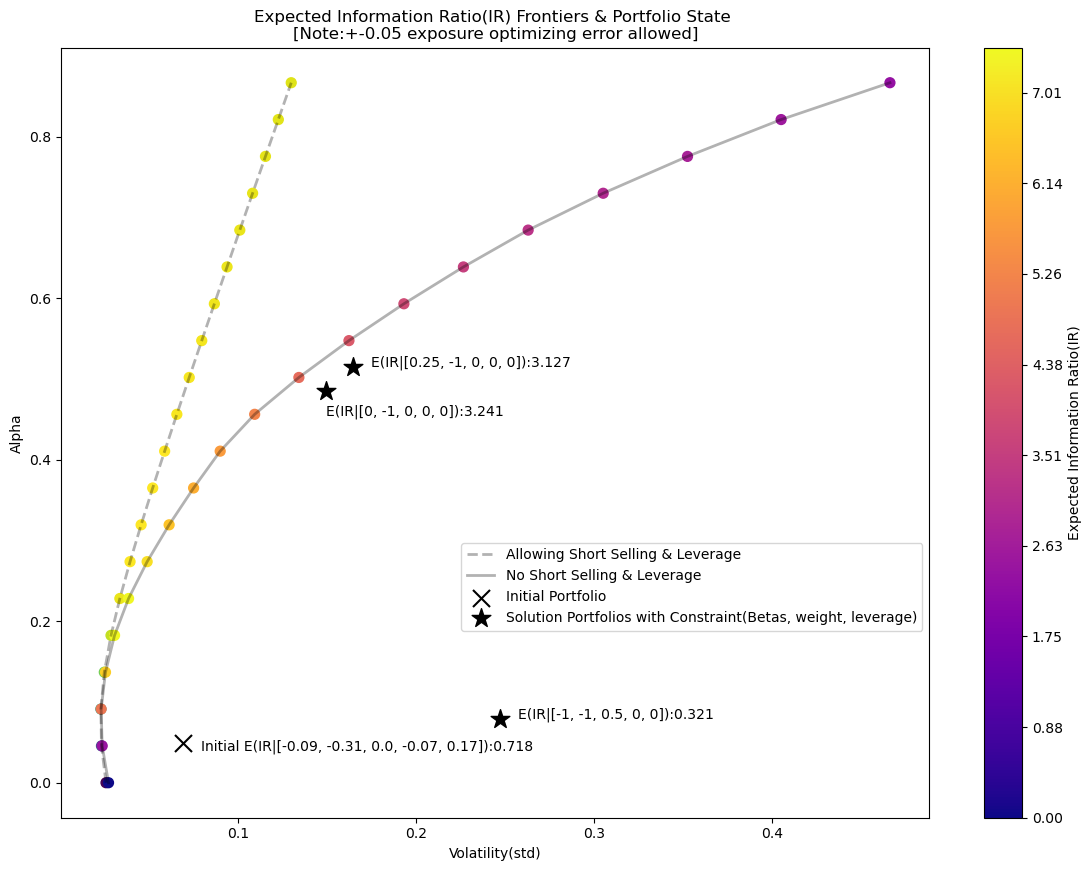

In [17]:
def generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=True, num_points=20):
    efficient_frontier = []
    #target_returns = np.linspace(min(returns), max(returns), num_points)
    target_returns = np.linspace(0, max(returns), num_points)
    

    for i, target_return in enumerate(target_returns):
        print(str(i),"/",str(len(target_returns)))
        

        if allow_short:
            bounds = tuple((-1, 1) for asset in range(len(returns)))
            #target_return = target_return * 8 # be cautious !! this is just for plotting purpose!! should be remove in future applicaiton
        else:
            bounds = tuple((0, 1) for asset in range(len(returns)))
            
        constraints = ({'type': 'eq', 'fun': lambda weights: calculate_portfolio_return(weights, returns) - target_return},
                       {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

        result = minimize(
            calculate_portfolio_volatility,
            x0=np.ones(len(returns)) / len(returns),
            args=(cov_matrix,),
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )

        efficient_frontier.append([target_return, result.fun, (target_return - risk_free_rate) / result.fun])

    return np.array(efficient_frontier)

# Example usage:
returns = alphas * 250 # replace with your asset returns: Annualized return
cov_matrix = cov_residuals * 250# replace with your covariance matrix: Annulized volatitlity
risk_free_rate = 0.00  # replace with your risk-free rate

alphas_annualized = alphas * 250
cov_residuals_annualized = cov_residuals * 250


plt.figure(figsize=(14,10))# Adjust the width and height as needed

plot_efficient_frontiers(returns, cov_matrix, risk_free_rate)

Initial_IR = (portfolio_alpha(initial_weight, alphas_annualized)/np.sqrt(portfolio_variance(initial_weight, cov_residuals_annualized)))
Initial_exposure = str(np.round(initial_state.iloc[0,0:5], decimals=2).tolist())
plt.scatter(np.sqrt(portfolio_variance(initial_weight, cov_residuals_annualized)), portfolio_alpha(initial_weight, alphas_annualized), label = 'Initial Portfolio',  marker='x', c = 'black', s= 150)
plt.text(np.sqrt(portfolio_variance(initial_weight, cov_residuals_annualized)) + 0.01, portfolio_alpha(initial_weight, alphas_annualized) - 0.01, 'Initial E(IR|'+Initial_exposure +'):' + str(round(Initial_IR, 3)), color='black', fontsize=10, ha='left')

for i, result in enumerate(results):

    Solution_IR = (portfolio_alpha(result.x, alphas_annualized)/np.sqrt(portfolio_variance(result.x, cov_residuals_annualized)))
    if i == 0:
        plt.scatter(np.sqrt(portfolio_variance(result.x, cov_residuals_annualized)), portfolio_alpha(result.x, alphas_annualized), label = 'Solution Portfolios with Constraint(Betas, weight, leverage)' ,  marker='*',c = 'black', s = 200)
        plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals_annualized)), portfolio_alpha(result.x, alphas_annualized) - 0.03, 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')

    else:
        plt.scatter(np.sqrt(portfolio_variance(result.x, cov_residuals_annualized)), portfolio_alpha(result.x, alphas_annualized), marker='*',  c = 'black' , s = 200)
        if i==1:
            plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals_annualized))+0.01, portfolio_alpha(result.x, alphas_annualized) , 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')
        elif i==2:
            plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals_annualized))+0.01, portfolio_alpha(result.x, alphas_annualized) , 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')
        else:
            plt.text(np.sqrt(portfolio_variance(result.x, cov_residuals_annualized)), portfolio_alpha(result.x, alphas_annualized), 'E(IR|'+str(betas_targets[i])+'):' + str(round(Solution_IR, 3)), color='black', fontsize=10, ha='left')
  
#plt.legend(loc='right')
plt.legend(loc='right', bbox_to_anchor=(1, 0.3))
#plt.colorbar(label='Expected Information Ratio(IR)')


plt.show()

In [18]:
sharpe_ratio_max

7.012149886370653

In [19]:
sharpe_ratio_max

7.012149886370653

In [20]:
alphas*250

array([ 0.07427318,  0.14384545, -0.02107353,  0.05234866,  0.10379884,
       -0.07106889,  0.21942359, -0.04936194,  0.51408711, -0.28888494,
        0.02780953, -0.29185756,  0.0984326 ,  0.36839229, -0.10735029,
        0.07009002,  0.12674214,  0.27313549,  0.32634913,  0.10057544,
       -0.02674381, -0.16449593,  0.0602272 , -0.09592973,  0.00995237,
       -0.08422748,  0.03149574,  0.15892078, -0.07842796,  0.0446768 ,
        0.20629976, -0.08272793, -0.29322062,  0.11574275,  0.14805765,
       -0.02896632,  0.27496928,  0.22006632, -0.00127938, -0.16167777,
        0.01869272,  0.02370798,  0.0233481 ,  0.11002745,  0.86698319,
        0.01794069,  0.02720361,  0.11322999,  0.12633392, -0.02920326,
       -0.21025134,  0.09382871, -0.0425105 , -0.2368759 ,  0.00400624,
       -0.00458821, -0.01592444,  0.09060905,  0.15492173,  0.04292656,
       -0.10807565,  0.02985211,  0.22645853, -0.26158439,  0.1059035 ,
        0.15657097,  0.08062673,  0.19793994, -0.03206488,  0.34

In [53]:
print(initial_weight)

[ 0.0099352   0.01034927 -0.00986236  0.01010363 -0.0099337   0.00963489
  0.00980192 -0.00972035  0.01201944  0.01049386 -0.0102599  -0.01093406
  0.01123449  0.00940263 -0.01016313  0.00956092 -0.01067561  0.01053335
 -0.00988223 -0.00966822  0.01074547 -0.01113493 -0.0101785  -0.01140752
  0.00955572 -0.01057071 -0.00990333 -0.01044238 -0.01003401 -0.00987517
  0.00969746 -0.01076358 -0.01035955  0.01010683  0.0104412   0.01131499
  0.00980726 -0.01031215 -0.01101643  0.0100219  -0.00942383 -0.00970272
 -0.00916026  0.00966312 -0.0102354   0.0098111   0.01019053  0.01007294
  0.00978836 -0.01139942 -0.01041047 -0.01003467  0.01023225 -0.00951537
  0.00980966 -0.00964288  0.01140381  0.01007347  0.00942457  0.00962492
 -0.01269963  0.00979843  0.00991358 -0.01037976  0.00942733 -0.00934588
  0.01002926  0.01013479  0.01026567 -0.00944093 -0.00997817 -0.01152762
  0.01056546 -0.00971612  0.00967399 -0.00996354 -0.00766848 -0.01012421
  0.00957455  0.00967479  0.0103362   0.00920524 -0

In [21]:
str(betas_targets[0])

'[0, -1, 0, 0, 0]'

In [22]:
initial_state = pd.DataFrame([beta_calculation_long_short_strategy(betas[i], initial_weight) for i in betas.columns])
initial_state = initial_state.T 
initial_state.columns = betas.columns
initial_state['alpha'] = portfolio_alpha(initial_weight, alphas)
initial_state['Constrained_information_ratio'] = - objective_function(initial_weight)
initial_state['Long/Short ratio'] = -(initial_weight[initial_weight>0].sum()/initial_weight[initial_weight<0].sum())
initial_state['Long weight position'] = initial_weight[initial_weight>0].sum()
initial_state['Short weight position'] = initial_weight[initial_weight<0].sum()
initial_state['Sum of long and Short weight'] = initial_state['Long weight position'] + initial_state['Short weight position']

initial_state

,mkt,smb,hml,rmw,cma,alpha,Constrained_information_ratio,Long/Short ratio,Long weight position,Short weight position,Sum of long and Short weight
0,-0.08731,-0.31485,0.001157,-0.071442,0.170551,0.000198,0.04543,1.012189,0.503029,-0.496971,0.006058


In [23]:
updated_state = pd.DataFrame([beta_calculation_long_short_strategy(betas[i], np.array(result.x)) for i in betas.columns])
updated_state = updated_state.T 
updated_state.columns = betas.columns
updated_state['alpha'] = portfolio_alpha(np.array(result.x), alphas)
updated_state['Constrained_information_ratio'] = - objective_function(np.array(result.x))

temp = pd.DataFrame(np.array(result.x))
updated_state['Long/Short ratio'] = -(temp[temp[0]>0].sum()/temp[temp[0]<0].sum())
updated_state['Long weight position'] = temp[temp[0]>0].sum()
updated_state['Short weight position'] = temp[temp[0]<0].sum()
updated_state['Sum of long and Short weight'] = updated_state['Long weight position'] + updated_state['Short weight position']
updated_state

,mkt,smb,hml,rmw,cma,alpha,Constrained_information_ratio,Long/Short ratio,Long weight position,Short weight position,Sum of long and Short weight
0,-0.908242,-0.915356,0.441271,-0.07323,0.052163,0.000318,0.02033,0.947864,1.366028,-1.441164,-0.075137


In [24]:
Report = pd.concat([initial_state, updated_state])
Report.index = ['Initial Portfolio', 'Optimized Portforlio Given Constraints']
Report

,mkt,smb,hml,rmw,cma,alpha,Constrained_information_ratio,Long/Short ratio,Long weight position,Short weight position,Sum of long and Short weight
Initial Portfolio,-0.087310,-0.314850,0.001157,-0.071442,0.170551,0.000198,0.04543,1.012189,0.503029,-0.496971,0.006058
Optimized Portforlio Given Constraints,-0.908242,-0.915356,0.441271,-0.073230,0.052163,0.000318,0.02033,0.947864,1.366028,-1.441164,-0.075137


In [25]:
Weight_comparison = pd.DataFrame([initial_weight, np.array(result.x)])
Weight_comparison.index = ['Original', 'Updated']
Weight_comparison = Weight_comparison.T

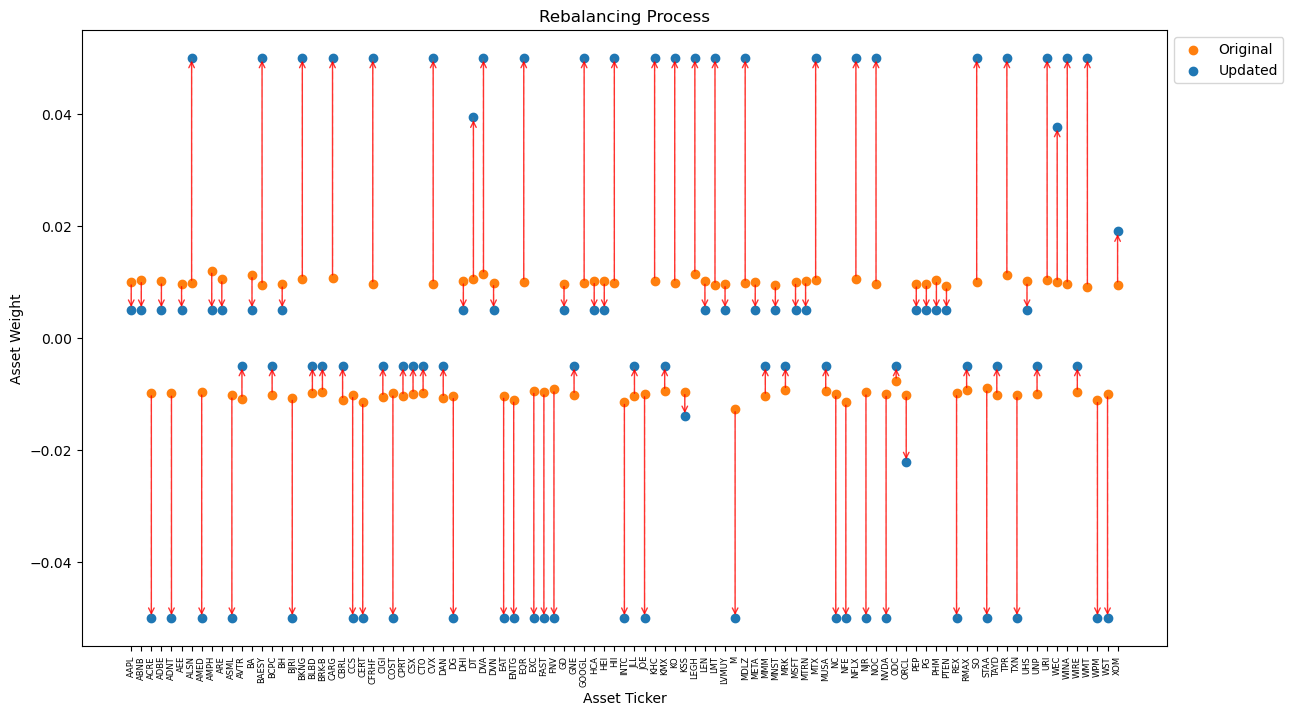

In [26]:
# Set the plot size
plt.figure(figsize=(14, 8))

# Scatter plot
plt.scatter(range(Weight_comparison.shape[0]), Weight_comparison['Original'], label='Original', color='#ff7f0e')
plt.scatter(range(Weight_comparison.shape[0]), Weight_comparison['Updated'], label='Updated', color='#1f77b4')
plt.title('Scatter Plot')
plt.xlabel('Asset Ticker')
plt.ylabel('Asset Weight')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


for i in range(Weight_comparison.shape[0]):
    plt.plot([i, i], [Weight_comparison['Original'][i], Weight_comparison['Updated'][i]], '--',color='#ff7f0e', alpha = 0.1)
    plt.annotate("", xy=(i, Weight_comparison['Updated'][i]), xytext=(i, Weight_comparison['Original'][i]),
                 arrowprops=dict(arrowstyle="->", color='red', alpha=0.8))


# Assign labels to x-axis values
plt.xticks(range(Weight_comparison.shape[0]), labels= df_asset['Ticker'], rotation=90, fontsize=6)


plt.title('Rebalancing Process')
plt.show()

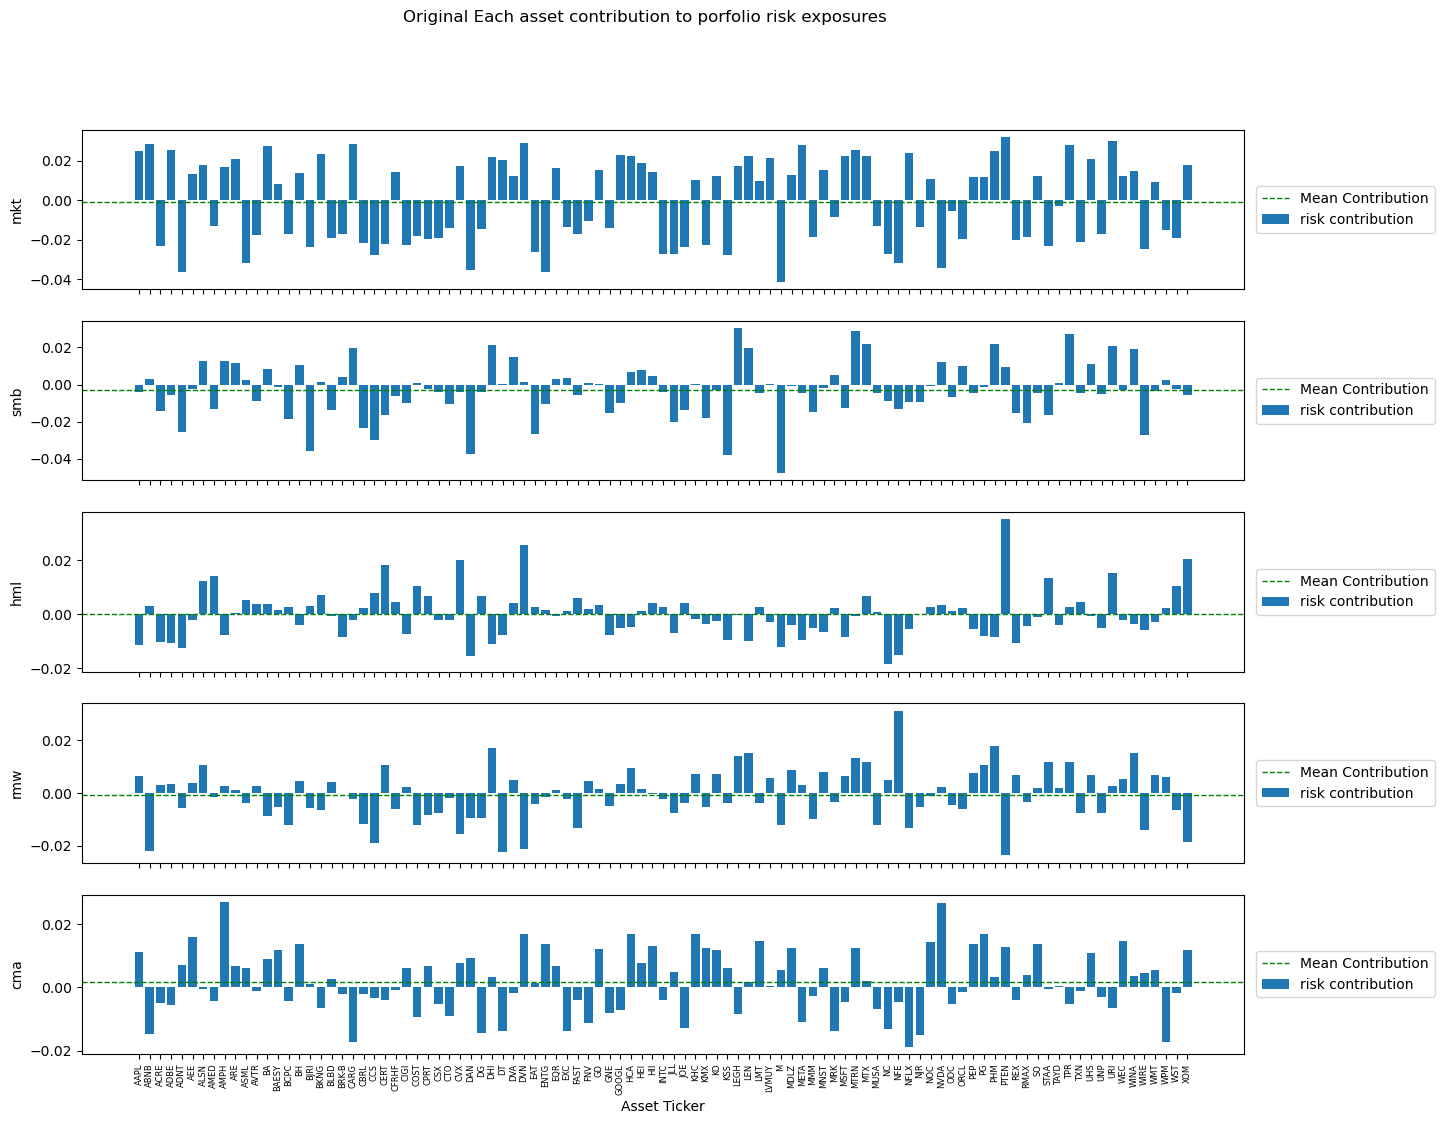

'\nhml_beta_upper_bound = 0.05\nhml_beta_lower_bound\n'

In [27]:
# Set the plot size
fig, axs = plt.subplots(5, 1, figsize=(15, 12), sharex=True)


portolio_risk_upper_bound = [mkt_beta_upper_bound,smb_beta_upper_bound,hml_beta_upper_bound,rmw_beta_upper_bound,cma_beta_upper_bound]
portolio_risk_lower_bound = [mkt_beta_lower_bound,smb_beta_lower_bound,hml_beta_lower_bound,rmw_beta_lower_bound,cma_beta_lower_bound]




# Plot each column in a separate subplot
for i, col in enumerate(['mkt', 'smb', 'hml', 'rmw', 'cma']):
    axs[i].bar(df_asset.index, df_asset[col] * df_asset['Beta_weight'] * 2, label='risk contribution')
    
    axs[i].set_ylabel(col)
    
    #plot the portfolio weighted-average beta
    axs[i].axhline(y=(df_asset[col]*df_asset['Beta_weight']).mean()*2, color='green', linestyle='--', linewidth=1, label='Mean Contribution')  # Add horizontal line at y=0
     
    #plot the portfolio constraint threshold    
    #axs[i].axhline(y = portolio_risk_upper_bound[i]/df_asset.shape[0], color='red', linestyle='--', linewidth=1, label='Mean Upper bound') 
    #axs[i].axhline(y = portolio_risk_lower_bound[i]/df_asset.shape[0], color='red', linestyle='--', linewidth=1, label='Mean lower bound') 
    
    axs[i].legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0.)

    

# Add labels and title
plt.xlabel('Asset Ticker')
plt.suptitle('Original Each asset contribution to porfolio risk exposures')

plt.xticks(range(Weight_comparison.shape[0]), labels= df_asset['Ticker'], rotation=90, fontsize=6)




plt.show()



'''
hml_beta_upper_bound = 0.05
hml_beta_lower_bound
'''

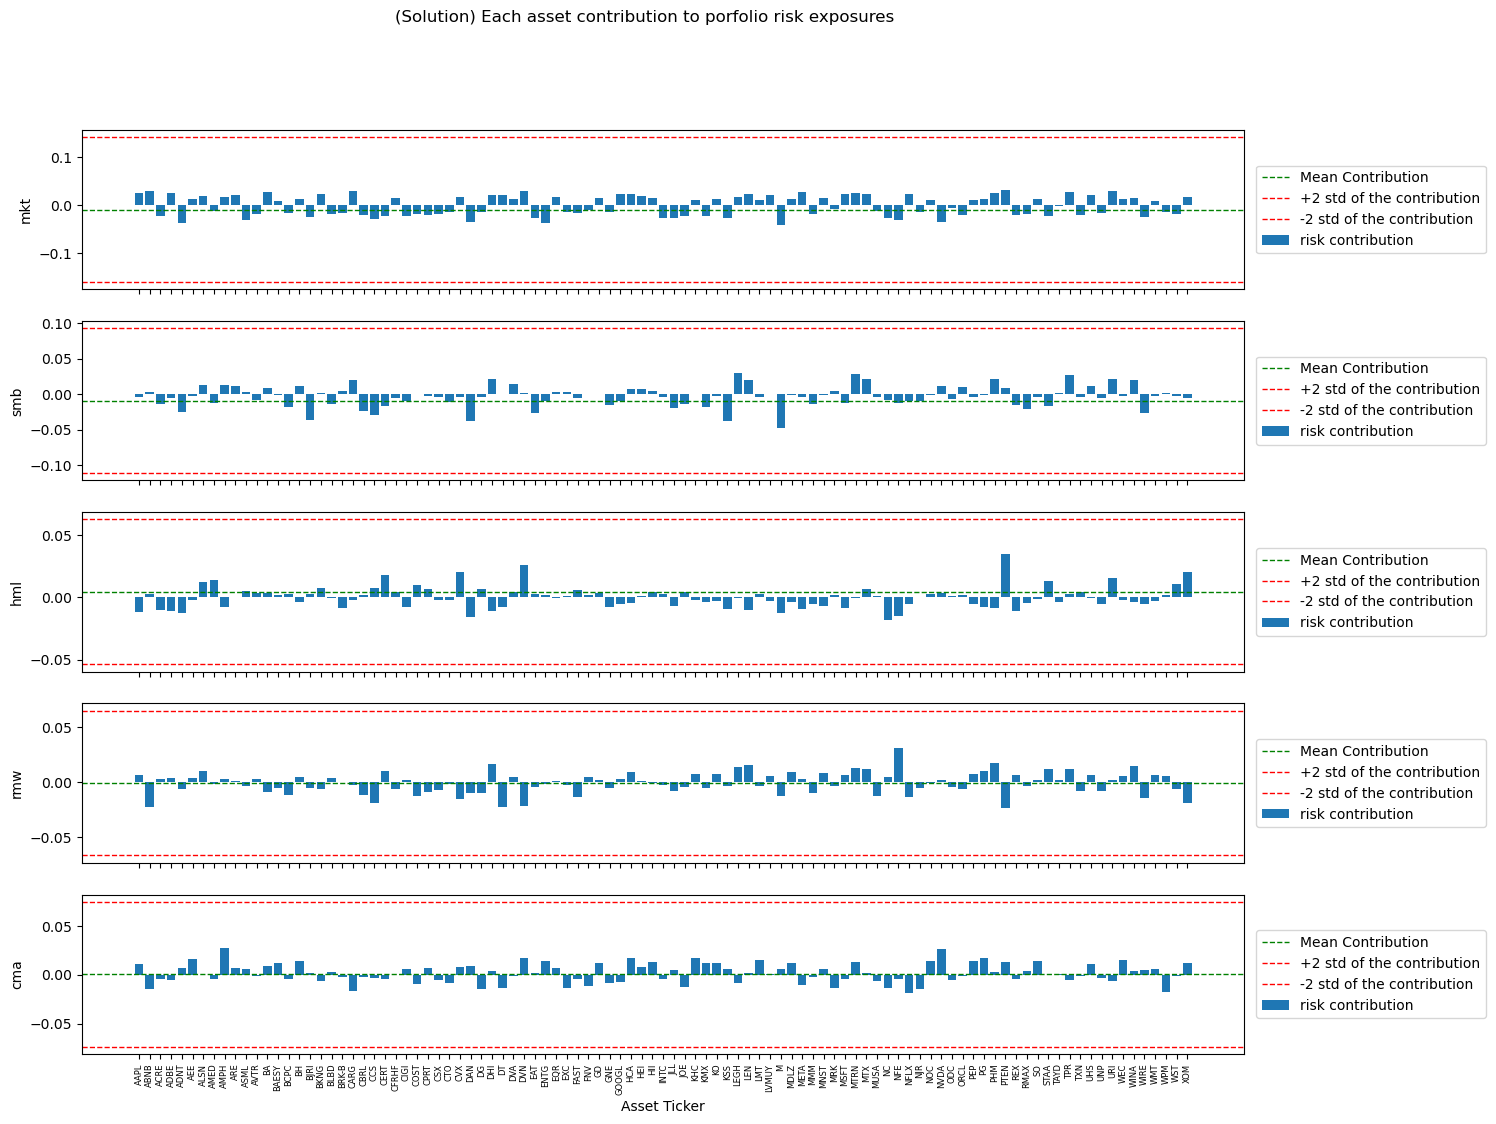

In [28]:
# Set the plot size
fig, axs = plt.subplots(5, 1, figsize=(15, 12), sharex=True)


portolio_risk_upper_bound = [mkt_beta_upper_bound,smb_beta_upper_bound,hml_beta_upper_bound,rmw_beta_upper_bound,cma_beta_upper_bound]
portolio_risk_lower_bound = [mkt_beta_lower_bound,smb_beta_lower_bound,hml_beta_lower_bound,rmw_beta_lower_bound,cma_beta_lower_bound]




# Plot each column in a separate subplot
for i, col in enumerate(['mkt', 'smb', 'hml', 'rmw', 'cma']):
    
    #axs[i].scatter(df_asset.index, df_asset[col] * df_asset['Beta_weight'] * 2, label='Asset contribution')
    axs[i].bar(df_asset.index, df_asset[col] * df_asset['Beta_weight'] * 2, label='risk contribution')
    
    axs[i].set_ylabel(col)
    
    #plot the portfolio weighted-average beta
    axs[i].axhline(y=(df_asset[col]*result.x).mean()*2, color='green', linestyle='--', linewidth=1, label='Mean Contribution')  # Add horizontal line at y=0
     
    #plot the contribution  +-2*std
    axs[i].axhline(y = (df_asset[col]*result.x).mean()*2+(df_asset[col]*result.x).std()*2*2, color='red', linestyle='--', linewidth=1, label='+2 std of the contribution') 
    axs[i].axhline(y = (df_asset[col]*result.x).mean()*2-(df_asset[col]*result.x).std()*2*2, color='red', linestyle='--', linewidth=1, label='-2 std of the contribution') 
    
    axs[i].legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0.)

    

# Add labels and title
plt.xlabel('Asset Ticker')
plt.suptitle('(Solution) Each asset contribution to porfolio risk exposures')

plt.xticks(range(Weight_comparison.shape[0]), labels= df_asset['Ticker'], rotation=90, fontsize=6)




plt.show()

In [29]:
(df_asset['mkt']*result.x)

0     0.006266
1     0.006836
2    -0.058949
3     0.006231
4    -0.091854
        ...   
94   -0.006339
95    0.025422
96   -0.034203
97   -0.047877
98    0.017529
Name: mkt, Length: 99, dtype: float64

In [28]:
(df_asset['mkt']*result.x*2).std()

0.061198265734134685

# Efficient frontier

0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


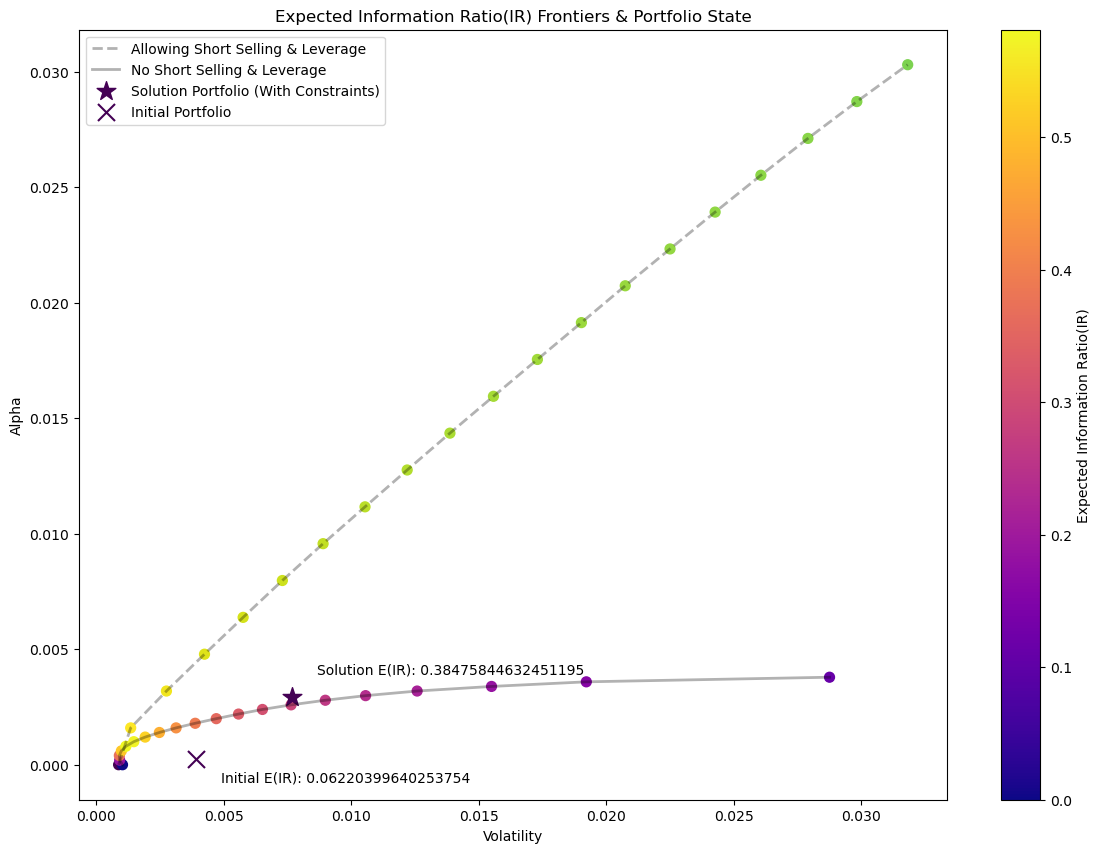

In [30]:
(portfolio_alpha(result.x, alphas)/np.sqrt(portfolio_variance(result.x, cov_residuals)))

0.38475844632451195

In [31]:
sharpe_ratio_max

1.1837747218037933

In [32]:
result.x@alphas

0.0014732620017317338

In [33]:
portfolio_alpha(result.x, alphas)

0.0029465240034634676

In [34]:
np.sqrt(portfolio_variance(result.x, cov_residuals))

0.007658113893563023

In [35]:
portfolio_alpha(result.x, alphas)/np.sqrt(portfolio_variance(result.x, cov_residuals))

0.38475844632451195

In [36]:
initial_weight

array([ 0.0099352 ,  0.01034927, -0.00986236,  0.01010363, -0.0099337 ,
        0.00963489,  0.00980192, -0.00972035,  0.01201944,  0.01049386,
       -0.0102599 , -0.01093406,  0.01123449,  0.00940263, -0.01016313,
        0.00956092, -0.01067561,  0.01053335, -0.00988223, -0.00966822,
        0.01074547, -0.01113493, -0.0101785 , -0.01140752,  0.00955572,
       -0.01057071, -0.00990333, -0.01044238, -0.01003401, -0.00987517,
        0.00969746, -0.01076358, -0.01035955,  0.01010683,  0.0104412 ,
        0.01131499,  0.00980726, -0.01031215, -0.01101643,  0.0100219 ,
       -0.00942383, -0.00970272, -0.00916026,  0.00966312, -0.0102354 ,
        0.0098111 ,  0.01019053,  0.01007294,  0.00978836, -0.01139942,
       -0.01041047, -0.01003467,  0.01023225, -0.00951537,  0.00980966,
       -0.00964288,  0.01140381,  0.01007347,  0.00942457,  0.00962492,
       -0.01269963,  0.00979843,  0.00991358, -0.01037976,  0.00942733,
       -0.00934588,  0.01002926,  0.01013479,  0.01026567, -0.00

In [37]:
beta_calculation_long_short_strategy(np.array(df_asset[col]), np.array(df_asset['Beta_weight']))

0.17225038691976913

In [38]:
mkt_beta_upper_bound

0.05

# industry distribution

In [39]:

## for industry distribution

'''
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

def get_industry_from_yahoo(ticker):
    url = f"https://finance.yahoo.com/quote/{ticker}/profile?p={ticker}"

    try:
        # Use Selenium to open the page and let JavaScript execute
        options = webdriver.ChromeOptions()
        options.add_argument('--headless')  # Run Chrome in headless mode (without opening a browser window)
        driver = webdriver.Chrome(options=options)

        driver.get(url)

        # Get the page source after JavaScript has executed
        page_source = driver.page_source
        driver.quit()

        soup = BeautifulSoup(page_source, 'html.parser')

        # Find the element containing industry information
        industry_element = soup.find("span", class_="Fw(600)")

        if industry_element:
            industry = industry_element.get_text(strip=True)
            print(f"The industry of {ticker} is: {industry}")
        else:
            print(f"Industry information not available for {ticker}")

    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
    except requests.exceptions.RequestException as err:
        print(f"Request Error: {err}")
        
    return industry_element

# Example usage
industry_element = get_industry_from_yahoo("AAPL")
'''

#https://finance.yahoo.com/quote/ANF/profile?p=ANF

'\nimport requests\nfrom bs4 import BeautifulSoup\nfrom selenium import webdriver\n\ndef get_industry_from_yahoo(ticker):\n    url = f"https://finance.yahoo.com/quote/{ticker}/profile?p={ticker}"\n\n    try:\n        # Use Selenium to open the page and let JavaScript execute\n        options = webdriver.ChromeOptions()\n        options.add_argument(\'--headless\')  # Run Chrome in headless mode (without opening a browser window)\n        driver = webdriver.Chrome(options=options)\n\n        driver.get(url)\n\n        # Get the page source after JavaScript has executed\n        page_source = driver.page_source\n        driver.quit()\n\n        soup = BeautifulSoup(page_source, \'html.parser\')\n\n        # Find the element containing industry information\n        industry_element = soup.find("span", class_="Fw(600)")\n\n        if industry_element:\n            industry = industry_element.get_text(strip=True)\n            print(f"The industry of {ticker} is: {industry}")\n        else:\

In [40]:
#industry_element

# Tool box efficient frontier

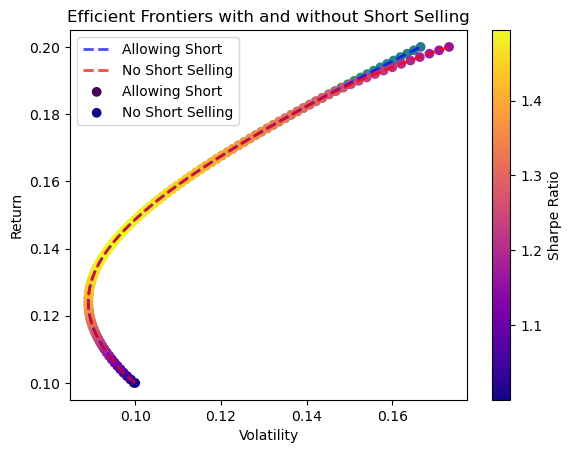

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def calculate_portfolio_return(weights, returns):
    return np.dot(weights, returns)

def calculate_portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def objective_function(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = calculate_portfolio_return(weights, returns)
    portfolio_volatility = calculate_portfolio_volatility(weights, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Minimize the negative of the Sharpe ratio

def optimize_weights(returns, cov_matrix, risk_free_rate, allow_short=True):
    num_assets = len(returns)
    
    if allow_short:
        bounds = tuple((-1, 1) for asset in range(num_assets))
    else:
        bounds = tuple((0, 1) for asset in range(num_assets))

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    initial_weights = np.ones(num_assets) / num_assets  # Equal weights to start with

    result = minimize(
        objective_function,
        initial_weights,
        args=(returns, cov_matrix, risk_free_rate),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return result.x

def generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=True, num_points=100):
    efficient_frontier = []
    target_returns = np.linspace(min(returns), max(returns), num_points)

    for target_return in target_returns:
        constraints = ({'type': 'eq', 'fun': lambda weights: calculate_portfolio_return(weights, returns) - target_return},
                       {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

        if allow_short:
            bounds = tuple((-1, 1) for asset in range(len(returns)))
        else:
            bounds = tuple((0, 1) for asset in range(len(returns)))

        result = minimize(
            calculate_portfolio_volatility,
            x0=np.ones(len(returns)) / len(returns),
            args=(cov_matrix,),
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )

        efficient_frontier.append([target_return, result.fun, (target_return - risk_free_rate) / result.fun])

    return np.array(efficient_frontier)

def plot_efficient_frontiers(returns, cov_matrix, risk_free_rate):
    efficient_frontier_short = generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=True)
    efficient_frontier_no_short = generate_efficient_frontier(returns, cov_matrix, risk_free_rate, allow_short=False)

    plt.plot(efficient_frontier_short[:, 1], efficient_frontier_short[:, 0], 'b--', label='Allowing Short', alpha=0.7, linewidth=2)
    plt.plot(efficient_frontier_no_short[:, 1], efficient_frontier_no_short[:, 0], 'r--', label='No Short Selling', alpha=0.7, linewidth=2)
    
    # Add colored points based on Sharpe ratio
    plt.scatter(efficient_frontier_short[:, 1], efficient_frontier_short[:, 0], c=efficient_frontier_short[:, 2], cmap='viridis', marker='o', label='Allowing Short')
    plt.scatter(efficient_frontier_no_short[:, 1], efficient_frontier_no_short[:, 0], c=efficient_frontier_no_short[:, 2], cmap='plasma', marker='o', label='No Short Selling')
    plt.colorbar(label='Sharpe Ratio')
    
    
    plt.title('Efficient Frontiers with and without Short Selling')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Example usage:
returns = np.array([0.1, 0.15, 0.2])  # replace with your asset returns
cov_matrix = np.array([[0.01, 0.005, 0.002],
                       [0.005, 0.02, 0.01],
                       [0.002, 0.01, 0.03]])  # replace with your covariance matrix
risk_free_rate = 0.00  # replace with your risk-free rate

plot_efficient_frontiers(returns, cov_matrix, risk_free_rate)
